In [3]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

In [2]:
#|export
def is_cat(x):
    return x[0].isupper()

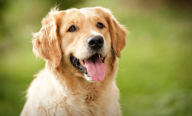

In [8]:
im = PILImage.create('C://Users/hamze/Documents/Projects/dog.jpg')
im.thumbnail((192, 192))
im

In [9]:
#|export

learner = load_learner('C://Users/hamze/Documents/Projects/model.pkl')

C:\Users\hamze\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [10]:
learner.predict(im)

('False', tensor(0), tensor([9.9999e-01, 1.3134e-05]))

In [11]:
#|export

categories = ('dog', 'cat')

def classify_image(img):
    pred, idx, probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))

In [12]:
classify_image(im)

{'dog': 0.9999868869781494, 'cat': 1.3133921129337978e-05}

In [16]:
#|export

image = gr.Image(height=192, width=192)
label = gr.Label()

examples = ['dog.jpg',
            'cat.jpg',
            'dunno.jpg',
            'bird.jpg'] 

intf = gr.Interface(fn=classify_image,inputs=image,outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [19]:
from nbdev.export import nb_export
nb_export('Load pets model _ gradio.ipynb')